# Loading in our data from main.ipynb to build the initial model

### Loading the data

In [50]:
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt
import numpy as np

with open("prepared_data.pkl", "rb") as f:
    data = pickle.load(f)

X_train = data["X_train"]
X_val = data["X_val"]
X_test = data["X_test"]
y_train = data["y_train"]
y_val = data["y_val"]
y_test = data["y_test"]
# class_weights_dict = data["class_weights"]
num_classes = data["num_classes"]

### Data Normalization

In [51]:
X_train = X_train.astype("float32") / 255.0
X_val   = X_val.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

### Building the model

In [52]:
def leNet_model_iteration4(num_classes):
    model = Sequential()

    model.add(Conv2D(64, (5,5), input_shape=(28,28,1)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(128, (3,3)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(2,2))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


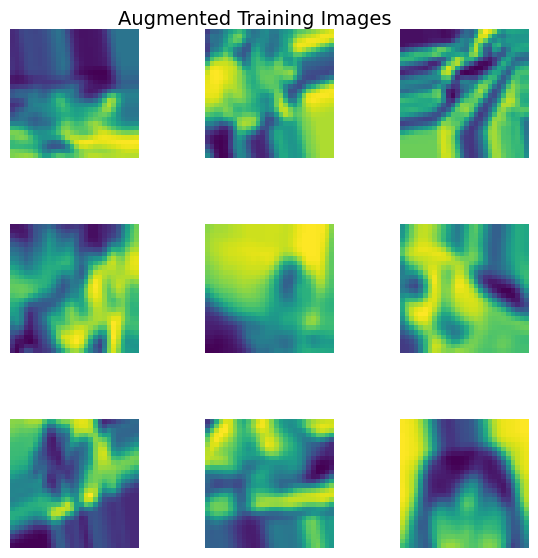

In [53]:
datagen = ImageDataGenerator(
    width_shift_range=0.5,
    height_shift_range=0.2,
    zoom_range=0.4,
    shear_range=0.3,
    rotation_range=15
)

datagen.fit(X_train)

train_generator = datagen.flow(X_train, y_train, batch_size=50)

batches = datagen.flow(X_train, y_train, batch_size=9)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(3, 3, figsize=(6, 6))
fig.tight_layout()

for i in range(9):
    r = i // 3
    c = i % 3
    axs[r, c].imshow(X_batch[i])
    axs[r, c].axis('off')

plt.suptitle('Augmented Training Images', fontsize=14)
plt.show()

### Training the model

In [54]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 50,
    epochs=30,
    batch_size=50,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/30
  4/819 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.3625 - loss: 2.1487

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.3494 - loss: 2.1322 - val_accuracy: 0.4459 - val_loss: 1.8126
Epoch 2/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.3499 - loss: 2.1305 - val_accuracy: 0.4527 - val_loss: 1.8260
Epoch 3/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.3560 - loss: 2.1095 - val_accuracy: 0.4527 - val_loss: 1.8155
Epoch 4/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.3562 - loss: 2.1073 - val_accuracy: 0.4624 - val_loss: 1.7913
Epoch 5/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.3482 - loss: 2.1313 - val_accuracy: 0.4582 - val_loss: 1.7901
Epoch 6/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.3631 - loss: 2.1020 - val_accuracy: 0.4516 - val_loss: 1.8158
Epoch 7/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.3644 - loss: 2.1029 - val_accuracy: 0.4552 - val_loss: 1.7937
Epoch 8/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.3582 - loss: 2.1077 - val_accurac

### Evaluating the model

285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5696 - loss: 1.3578
Test Loss: 1.6974830627441406
Test Accuracy: 0.4943956136703491


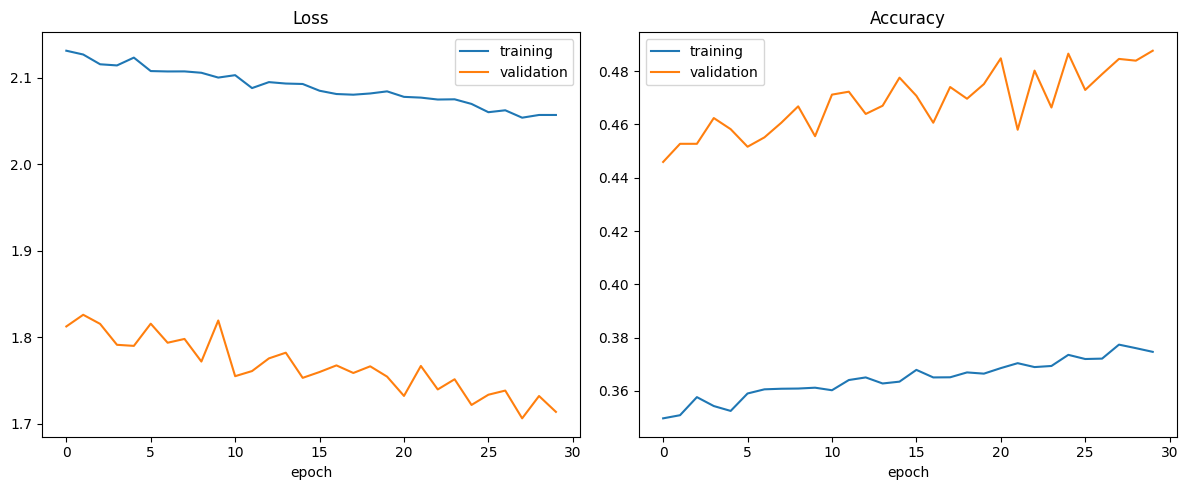

In [55]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title("Loss")
plt.xlabel("epoch")

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title("Accuracy")
plt.xlabel("epoch")

plt.tight_layout()
plt.show()
